## Image classification with Convolutional Neural Networks

Welcome to the first week of the second deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Here we import the libraries we need. We'll learn about what each does during the course.

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/whole_style_pt1/"

In [5]:
sz=224

## First look at pictures

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize (in this case, 'cats' and 'dogs').

In [6]:
!ls {PATH}

models	tmp  train  valid


In [7]:
!ls {PATH}valid

antique  clean	cool  cute  dark  event  modern  pop  sports  travel  vivid


In [8]:
!ls {PATH}train

antique  clean	cool  cute  dark  event  modern  pop  sports  travel  vivid


In [9]:
files = !ls {PATH}valid/cute | head
files

['03f0c728132521.55bf7dbf6f8f5.png',
 '04b91f57338861.59d261aa6be57.jpg',
 '04d2d429434151.55f297929cf29.jpg',
 '04de7a13465251.562745f1a9ac3.jpg',
 '04e6fe45697257.5607ae2e91605.jpg',
 '04eced55278491.597e493f697d1.png',
 '3d38a144471925.581366066fc14.jpg',
 '3d513a33084637.569f54c89ede3.jpg',
 '3d5b4b43804533.57fd4e618dd94.png',
 '3d788937740649.574b2f438c95d.png']

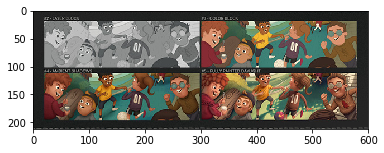

In [10]:
img = plt.imread(f'{PATH}valid/cute/{files[1]}')
plt.imshow(img);

Here is how the raw data looks like

In [11]:
img.shape

(212, 600, 3)

In [12]:
img[:4,:4]

array([[[ 94,  94,  92],
        [ 88,  88,  86],
        [ 83,  83,  81],
        [ 74,  74,  72]],

       [[154, 154, 152],
        [156, 156, 154],
        [149, 149, 147],
        [142, 142, 140]],

       [[ 40,  40,  38],
        [ 44,  44,  42],
        [ 45,  45,  43],
        [ 36,  36,  34]],

       [[ 27,  27,  27],
        [ 30,  30,  30],
        [ 28,  28,  28],
        [ 33,  33,  33]]], dtype=uint8)

## Our model:

In [13]:
# Uncomment the below if you need to reset your precomputed activations
!rm -rf {PATH}tmp

In [14]:
arch=resnet152
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

100%|██████████| 16/16 [00:15<00:00,  1.01it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[0.      2.22052 1.7184  0.43301]                         
[1.      1.76612 1.66092 0.43497]                         
[2.      1.56072 1.63522 0.45806]                         



How good is this model? Well, as we mentioned, prior to this competition, the state of the art was 80% accuracy. But the competition resulted in a huge jump to 98.9% accuracy, with the author of a popular deep learning library winning the competition. Extraordinarily, less than 4 years later, we can now beat that result in seconds! Even last year in this same course, our initial model had 98.3% accuracy, which is nearly double the error we're getting just a year later, and that took around 10 minutes to compute.

In [15]:
# This is the label for a val data
data.val_y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2

In [16]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['antique',
 'clean',
 'cool',
 'cute',
 'dark',
 'event',
 'modern',
 'pop',
 'sports',
 'travel',
 'vivid']

In [17]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(997, 11)

In [18]:
log_preds[:10]

array([[-0.12071, -7.17464, -3.68134, -6.30296, -4.25357, -2.93676, -5.93975, -4.9682 , -6.75249, -5.45369,
        -5.61649],
       [-0.88415, -5.79321, -4.28098, -3.5593 , -1.65751, -3.88745, -2.74452, -2.79545, -3.27899, -2.1834 ,
        -2.90414],
       [-2.55701, -4.15265, -0.86518, -1.12045, -4.4427 , -3.18074, -6.516  , -4.62494, -3.91688, -4.21538,
        -2.80745],
       [-2.10348, -3.2355 , -1.52349, -3.27317, -5.29834, -1.15292, -3.10594, -3.98134, -3.00379, -1.98611,
        -4.43879],
       [-0.98882, -5.92023, -5.9925 , -1.7397 , -3.68955, -4.80694, -2.23134, -6.65575, -5.32746, -1.21739,
        -5.39402],
       [-1.3219 , -3.36895, -2.36777, -4.05048, -3.62214, -2.0183 , -1.1952 , -2.49802, -3.92989, -4.13957,
        -4.85735],
       [-0.87724, -4.68052, -3.20894, -2.50522, -5.865  , -0.92904, -3.70194, -5.94558, -5.19438, -4.06498,
        -5.30585],
       [-0.70854, -6.83267, -7.07844, -3.22721, -5.03826, -6.14685, -2.67535, -7.7212 , -2.29857, -1.2508 ,
   

## Choosing a learning rate

In [32]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [33]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 95%|█████████▍| 35/37 [00:00<00:00, 60.15it/s, loss=11.8]


Our `learn` object contains an attribute `sched` that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

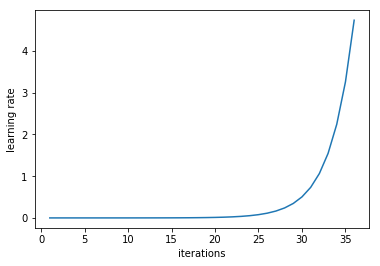

In [34]:
learn.sched.plot_lr()

Note that in the previous plot *iteration* is one iteration (or *minibatch*) of SGD. In one epoch there are 
(num_train_samples/num_iterations) of SGD.

We can see the plot of loss versus learning rate to see where our loss stops decreasing:

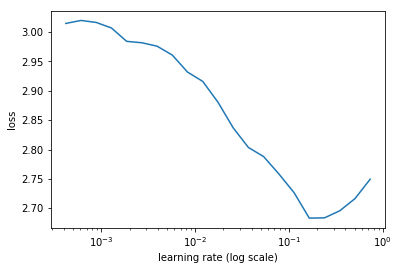

In [35]:
learn.sched.plot()

The loss is still clearly improving at lr=1e-2 (0.01), so that's what we use. Note that the optimal learning rate can change as we training the model, so you may want to re-run this function from time to time.

## Improving our model

### Data augmentation

In [36]:
tfms = tfms_from_model(resnet152, sz, aug_tfms=transforms_side_on,max_zoom=1.1)

In [37]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [38]:
ims = np.stack([get_augs() for i in range(6)])

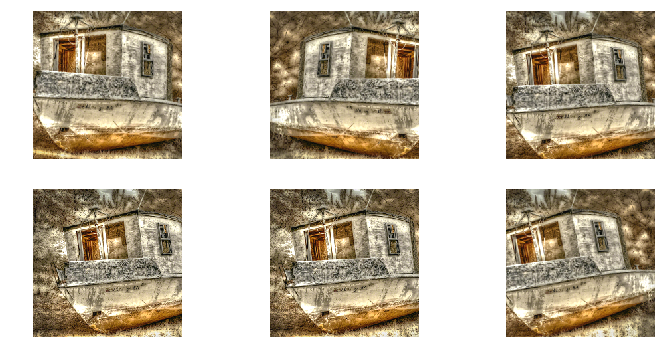

In [39]:
plots(ims, rows=2)

Let's create a new `data` object that includes this augmentation in the transforms.

In [40]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [41]:
learn.fit(1e-1, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[0.      2.50019 2.44127 0.3499 ]                         
[1.      2.51937 2.25655 0.35328]                         
[2.      2.36064 2.1399  0.41269]                         



By default when we create a learner, it sets all but the last layer to *frozen*. That means that it's still only updating the weights in the last layer when we call `fit`.

In [42]:
learn.fit(1e-1, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[0.      1.55397 1.73497 0.44634]                         
[1.      1.48135 1.83841 0.44882]                         
[2.      1.38637 1.81563 0.46561]                         



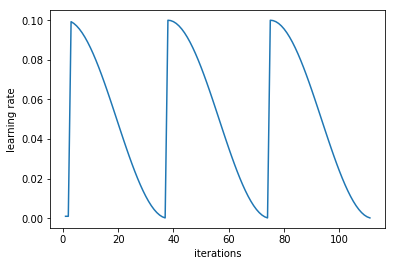

In [43]:
learn.sched.plot_lr()

Our validation loss isn't improving much, so there's probably no point further training the last layer on its own.

Since we've got a pretty good model at this point, we might want to save it so we can load it again later without training it from scratch.

In [44]:
learn.save('224_lastlayer')

In [45]:
learn.load('224_lastlayer')

### Fine-tuning and differential learning rate annealing

In [46]:
learn.unfreeze()

In [47]:
lr=np.array([1e-3,1e-2,1e-1])

In [48]:
learn.fit(lr, 3, cycle_len=3, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=39), HTML(value='')))

[0.      1.48371 1.70567 0.46482]                         
[1.      1.47742 1.63929 0.48079]                         
[2.      1.30598 1.59444 0.50245]                         
[3.      1.38828 1.82875 0.45175]                         
[4.      1.44866 1.79311 0.4688 ]                         
[5.      1.44794 1.80693 0.46703]                         
[6.      1.44929 1.71522 0.49623]                         
[7.      1.37163 1.75634 0.472  ]                         
[8.      1.26856 1.67954 0.49002]                         
[9.      1.12173 1.66589 0.51079]                         
[10.       1.00638  1.66647  0.51035]                      
[11.       0.92094  1.67442  0.50929]                      
[12.       1.06606  1.94052  0.49623]                      
[13.       1.49137  2.4383   0.43212]                     
[14.       1.62257  3.02052  0.40097]                     
[15.       1.83732  2.32614  0.38337]                     
[16.       1.82074  2.13462  0.35927]                

Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

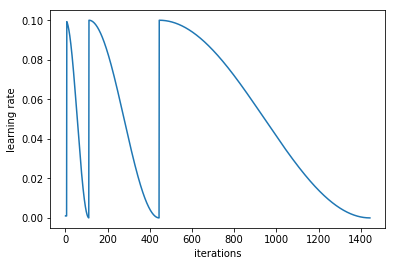

In [49]:
learn.sched.plot_lr()

Note that's what being plotted above is the learning rate of the *final layers*. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates as we initially requested (i.e. the first layers have 100x smaller, and middle layers 10x smaller learning rates, since we set `lr=np.array([1e-4,1e-3,1e-2])`.

In [50]:
learn.save('224_all')

In [61]:
learn.load('224_all')

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [62]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [53]:
accuracy(probs, y)

0.5095285857572718

## Analyzing results

### Confusion matrix 

In [54]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[54  2 12  2  8  2 14  9  1  2  3]
 [ 0 48 12  0  0  0 21  0  0  3  0]
 [ 3 14 61  8  1  0  4 15  4  7  7]
 [ 1  6 11 50  2  3  2  9  2  5  6]
 [ 4  0  8  2 51  2  2  5  4  1  1]
 [ 2  2  5  8  0 22  2  3  1  2  4]
 [ 1 22 13  3  1  4 56  3  3  3  4]
 [ 1  0  7 10  0  7  4 49  6  1 18]
 [ 2  6 12  8  3  0  7  9 26  2  3]
 [ 1  5  6  2  2  2  6  3  1 29  5]
 [ 0  3  3  6  2  3  4  6  3  4 62]]


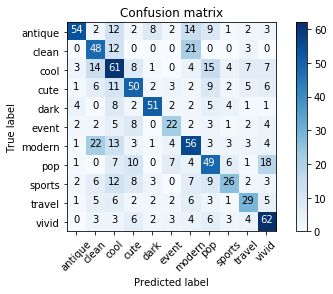

In [56]:
plot_confusion_matrix(cm, data.classes)